In [ ]:
import os
import shutil
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import skimage
import pywt
from skimage.filters import gaussian, median
from skimage.restoration import denoise_wavelet, denoise_tv_chambolle, denoise_tv_bregman, wiener
from PIL import Image

# Set the threshold values for MSE and SNR
mse_threshold = 100
snr_threshold = 20

# Define the directories containing the images for each category
benign = "./Bengin cases"
malignant = "./Malignant cases"
normal = "./Normal cases"

# Define the directories to store the noisy images for each category
benign_noisy = "benign_noisy"
malignant_noisy = "malignant_noisy"
normal_noisy = "normal_noisy"

# Define the directories to store the denoised images for each category
benign_denoised = "benign_denoised"
malignant_denoised = "malignant_denoised"
normal_denoised = "normal_denoised"

# Create the new directories to store the noisy and denoised images
os.makedirs(benign_noisy, exist_ok=True)
os.makedirs(malignant_noisy, exist_ok=True)
os.makedirs(normal_noisy, exist_ok=True)
os.makedirs(benign_denoised, exist_ok=True)
os.makedirs(malignant_denoised, exist_ok=True)
os.makedirs(normal_denoised, exist_ok=True)

# Loop over all the images in each category
for dir_path, dir_names, file_names in os.walk(benign):
    for file_name in file_names:
        # Load the image
        image_path = os.path.join(dir_path, file_name)
        image = skimage.io.imread(image_path)
        
        # Generate a noisy version of the image (e.g. by adding Gaussian noise)
        noisy_image = skimage.util.random_noise(image, mode='gaussian')
        
        # Calculate the MSE
        mse = mean_squared_error(image, noisy_image)
        
        # Calculate the SNR
        snr = peak_signal_noise_ratio(image, noisy_image)
        
        # Check if the image is noisy based on the MSE and SNR values
        if mse > mse_threshold and snr < snr_threshold:
            # Move the noisy image to the new directory
            shutil.move(image_path, os.path.join(benign_noisy, file_name))
            
            # Denoise the noisy image using DWT
            coeffs = pywt.dwt2(noisy_image, 'haar')
            coeffs = list(coeffs)
            coeffs[0] = denoise_wavelet(coeffs[0], method='VisuShrink', mode='soft', sigma=0.1, wavelet='haar')
            reconstructed_image = pywt.idwt2(coeffs, 'haar')
            denoised_image = np.clip(reconstructed_image, 0, 1)
            denoised_image = (denoised_image * 255).astype(np.uint8)
            
            # Save the denoised image to the new directory
            denoised_image_path = os.path.join(benign_denoised, file_name)
            denoised_image = Image.fromarray(denoised_image)
            denoised_image = denoised_image.convert('RGB')
            skimage.io.imsave(denoised_image_path, np.array(denoised_image))
            
            # Identify the type of noise removed
            removed_noise = "Gaussian"            
       
        
        else:
            # Denoise the image using Gaussian filter
            denoised_image = gaussian(image, sigma=1.0, multichannel=True)
            
            # Save the denoised image to the new directory
            denoised_image_path = os.path.join(benign_denoised, file_name)
            skimage.io.imsave(denoised_image_path, denoised_image)
            
            # Identify the type of noise removed
            removed_noise = "Gaussian"
                
    # Print the details of the processed image
    print("Processed image:", file_name)
    print("Removed noise:", removed_noise)
    print("MSE:", mse)
    print("SNR:", snr)
    print("-------------")

# Repeat the above process for the malignant and normal cases
# (You can copy and modify the code accordingly)

# Save the denoised images for each category to their respective directories
# (You can copy and modify the code accordingly)



In [ ]:
#test2
import os
import shutil
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import skimage
import pywt
from skimage.filters import gaussian, median
from skimage.restoration import denoise_wavelet, denoise_tv_chambolle, denoise_tv_bregman, wiener
from PIL import Image

# Set the threshold values for MSE and SNR
mse_threshold = 100
snr_threshold = 20

# Define the directories containing the images for each category
benign = "./Bengin cases"
malignant = "./Malignant cases"
normal = "./Normal cases"

# Define the directories to store the noisy images for each category
benign_noisy = "benign_noisy"
malignant_noisy = "malignant_noisy"
normal_noisy = "normal_noisy"

# Define the directories to store the denoised images for each category
benign_denoised = "benign_denoised"
malignant_denoised = "malignant_denoised"
normal_denoised = "normal_denoised"

# Create the new directories to store the noisy and denoised images
os.makedirs(benign_noisy, exist_ok=True)
os.makedirs(malignant_noisy, exist_ok=True)
os.makedirs(normal_noisy, exist_ok=True)
os.makedirs(benign_denoised, exist_ok=True)
os.makedirs(malignant_denoised, exist_ok=True)
os.makedirs(normal_denoised, exist_ok=True)

# Loop over all the images in each category
for dir_path, dir_names, file_names in os.walk(benign):
    for file_name in file_names:
        # Load the image
        image_path = os.path.join(dir_path, file_name)
        image = skimage.io.imread(image_path)
        
        # Generate a noisy version of the image (e.g. by adding Gaussian noise)
        noisy_image = skimage.util.random_noise(image, mode='gaussian')
        
        # Calculate the MSE
        mse = mean_squared_error(image, noisy_image)
        
        # Calculate the SNR
        snr = peak_signal_noise_ratio(image, noisy_image)
        
        # Check if the image is noisy based on the MSE and SNR values
        if mse > mse_threshold and snr < snr_threshold:
            # Move the noisy image to the new directory
            shutil.copy(image_path, os.path.join(benign_noisy, file_name))
            
            # Denoise the noisy image using DWT
            coeffs = pywt.dwt2(noisy_image, 'haar')
            coeffs = list(coeffs)
            coeffs[0] = denoise_wavelet(coeffs[0], method='VisuShrink', mode='soft', sigma=0.1, wavelet='haar')
            reconstructed_image = pywt.idwt2(coeffs, 'haar')
            denoised_image = np.clip(reconstructed_image, 0, 1)
            denoised_image = (denoised_image * 255).astype(np.uint8)
            
            # Save the denoised image to the new directory
            denoised_image_path = os.path.join(benign_denoised, file_name)
            denoised_image = Image.fromarray(denoised_image)
            denoised_image = denoised_image.convert('RGB')
            skimage.io.imsave(denoised_image_path, np.array(denoised_image))
            
            # Identify the type of noise removed
            removed_noise = "Gaussian"
        else:
            # Denoise the image using Gaussian filter
            denoised_image = gaussian(image, sigma=1.0, multichannel=True)
            
            # Save the denoised image to the new directory
            denoised_image_path = os.path.join(benign_denoised, file_name)
            skimage.io.imsave(denoised_image_path, denoised_image)
            
            # Identify the type of noise removed
            removed_noise = "Gaussian"
        
        # Print the details of the processed image
        print("Processed image:", file_name)
        print("Removed noise:", removed_noise)
        print("MSE:", mse)
        print("SNR:", snr)
        print("-------------")


           


In [ ]:
#test3 - working
import os
import shutil
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import skimage
import pywt
from skimage.filters import gaussian, median
from skimage.restoration import denoise_wavelet, denoise_tv_chambolle, denoise_tv_bregman, wiener
from PIL import Image

# Set the threshold values for MSE and SNR
mse_threshold = 100
snr_threshold = 20

# Define the directories containing the images for each category
benign = "./Bengin cases"
malignant = "./Malignant cases"
normal = "./Normal cases"

# Define the directories to store the noisy images for each category
benign_noisy = "benign_noisy"
malignant_noisy = "malignant_noisy"
normal_noisy = "normal_noisy"

# Define the directories to store the denoised images for each category
benign_denoised = "benign_denoised"
malignant_denoised = "malignant_denoised"
normal_denoised = "normal_denoised"

# Create the new directories to store the noisy and denoised images
os.makedirs(benign_noisy, exist_ok=True)
os.makedirs(malignant_noisy, exist_ok=True)
os.makedirs(normal_noisy, exist_ok=True)
os.makedirs(benign_denoised, exist_ok=True)
os.makedirs(malignant_denoised, exist_ok=True)
os.makedirs(normal_denoised, exist_ok=True)

# Loop over all the images in each category
for dir_path, dir_names, file_names in os.walk(benign):
    for file_name in file_names:
        # Load the image
        image_path = os.path.join(dir_path, file_name)
        image = skimage.io.imread(image_path)
        
        # Generate a noisy version of the image (e.g. by adding Gaussian noise)
        noisy_image = skimage.util.random_noise(image, mode='gaussian')
        
        # Calculate the MSE
        mse = mean_squared_error(image, noisy_image)
        
        # Calculate the SNR
        snr = peak_signal_noise_ratio(image, noisy_image)
        
        # Check if the image is noisy based on the MSE and SNR values
        if mse > mse_threshold and snr < snr_threshold:
            # Move the noisy image to the new directory
            shutil.copy(image_path, os.path.join(benign_noisy, file_name))
            
            # Denoise the noisy image using DWT
            coeffs = pywt.dwt2(noisy_image, 'haar')
            coeffs = list(coeffs)
            coeffs[0] = denoise_wavelet(coeffs[0], method='VisuShrink', mode='soft', sigma=0.1, wavelet='haar')
            reconstructed_image = pywt.idwt2(coeffs, 'haar')
            denoised_image = np.clip(reconstructed_image, 0, 1)
            denoised_image = (denoised_image * 255).astype(np.uint8)
            
            # Save the denoised image to the new directory
            denoised_image_path = os.path.join(benign_denoised, file_name)
            denoised_image = Image.fromarray(denoised_image)
            denoised_image = denoised_image.convert('RGB')
            skimage.io.imsave(denoised_image_path, np.array(denoised_image))
            removed_noise = "Gaussian"
        else:
            # Denoise the image using mean filter
            denoised_image = skimage.filters.rank.mean(image, skimage.morphology.disk(3))
            
            # Save the denoised image to the new directory
            denoised_image_path = os.path.join(benign_denoised, file_name)
            skimage.io.imsave(denoised_image_path, denoised_image)
            
            # Identify the type of noise removed
            removed_noise = "Mean Filter"

        # Print the details of the processed image
        print("Processed image:", file_name)
        print("Removed noise:", removed_noise)
        print("MSE:", mse)
        print("SNR:", snr)
        print("-------------")


In [ ]:
#test4 - working
import os
import shutil
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import skimage
import pywt
from skimage.filters import gaussian, median
from skimage.restoration import denoise_wavelet, denoise_tv_chambolle, denoise_tv_bregman, wiener
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageChops



# Set the threshold values for MSE and SNR
mse_threshold = 100
snr_threshold = 20

# Define the directories containing the images for each category
benign = "./Bengin cases"
malignant = "./Malignant cases"
normal = "./Normal cases"

# Define the directories to store the noisy images for each category
benign_noisy = "benign_noisy"
malignant_noisy = "malignant_noisy"
normal_noisy = "normal_noisy"

# Define the directories to store the denoised images for each category
benign_denoised = "benign_denoised"
malignant_denoised = "malignant_denoised"
normal_denoised = "normal_denoised"

# Create the new directories to store the noisy and denoised images
os.makedirs(benign_noisy, exist_ok=True)
os.makedirs(malignant_noisy, exist_ok=True)
os.makedirs(normal_noisy, exist_ok=True)
os.makedirs(benign_denoised, exist_ok=True)
os.makedirs(malignant_denoised, exist_ok=True)
os.makedirs(normal_denoised, exist_ok=True)

# Loop over all the images in each category
for dir_path, dir_names, file_names in os.walk(benign):
    for file_name in file_names:
        # Load the image
        image_path = os.path.join(dir_path, file_name)
        image = skimage.io.imread(image_path)
        
        # Generate a noisy version of the image (e.g. by adding Gaussian noise)
        noisy_image = skimage.util.random_noise(image, mode='gaussian')
        
        # Calculate the MSE
        mse = mean_squared_error(image, noisy_image)
        
        # Calculate the SNR
        snr = peak_signal_noise_ratio(image, noisy_image)
        
        # Check if the image is noisy based on the MSE and SNR values
        if mse > mse_threshold and snr < snr_threshold:
            # Move the noisy image to the new directory
            shutil.copy(image_path, os.path.join(benign_noisy, file_name))
            
            # Denoise the noisy image using DWT
            coeffs = pywt.dwt2(noisy_image, 'haar')
            coeffs = list(coeffs)
            coeffs[0] = denoise_wavelet(coeffs[0], method='VisuShrink', mode='soft', sigma=0.1, wavelet='haar')
            reconstructed_image = pywt.idwt2(coeffs, 'haar')
            denoised_image = np.clip(reconstructed_image, 0, 1)
            denoised_image = (denoised_image * 255).astype(np.uint8)
            
            # Save the denoised image to the new directory
            denoised_image_path = os.path.join(benign_denoised, file_name)
            denoised_image = Image.fromarray(denoised_image)
            denoised_image = denoised_image.convert('RGB')
            skimage.io.imsave(denoised_image_path, np.array(denoised_image))
           
            # Load the original image
            original_image = Image.open(image_path)

            # Calculate the absolute difference between the original and denoised images
            difference_image = ImageChops.difference(original_image, denoised_image)
            difference_image_path = os.path.join(benign_denoised, "difference_" + file_name)
            difference_image.save(difference_image_path)

            # Display the images
            fig, axs = plt.subplots(1, 4, figsize=(15, 5))
            axs[0].imshow(original_image)
            axs[0].set_title("Original")
            axs[1].imshow(noisy_image)
            axs[1].set_title("Noisy")
            axs[2].imshow(denoised_image)
            axs[2].set_title("Denoised")
            axs[3].imshow(difference_image)
            axs[3].set_title("Difference")
            plt.tight_layout()
            plt.show()


In [ ]:
import os
import shutil
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import skimage
import pywt
from skimage.filters import gaussian, median
from skimage.restoration import denoise_wavelet, denoise_tv_chambolle, denoise_tv_bregman, wiener
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

# Set the threshold values for MSE and SNR
mse_threshold = 100
snr_threshold = 20

# Define the directories containing the images for each category
benign = "./Bengin cases"
malignant = "./Malignant cases"
normal = "./Normal cases"

def is_noisy_image(image_path):
    # Open the image using PIL
    image = Image.open(image_path)
    
    # Convert the image to grayscale
    image_gray = image.convert("L")
    
    # Convert the grayscale image to a numpy array
    image_array = np.array(image_gray)
    
    # Calculate the MSE and SNR
    mse = mean_squared_error(image_array, np.zeros_like(image_array))
    snr = peak_signal_noise_ratio(image_array, np.zeros_like(image_array))
    
    # Determine if the image is noisy based on the thresholds
    if mse > mse_threshold or snr < snr_threshold:
        return True
    else:
        return False

def count_noisy_images(directory):
    # Initialize the counter
    num_noisy_images = 0
    
    # Iterate over the files in the directory
    for file_name in os.listdir(directory):
        # Check if the file is an image
        if file_name.endswith((".png", ".jpg", ".jpeg")):
            # Construct the path to the image file
            image_path = os.path.join(directory, file_name)
            
            # Check if the image is noisy
            if is_noisy_image(image_path):
                num_noisy_images += 1
    
    return num_noisy_images

# Count the number of noisy images in each directory
benign_noisy_count = count_noisy_images(benign)
malignant_noisy_count = count_noisy_images(malignant)
normal_noisy_count = count_noisy_images(normal)

# Print the results
print("Noisy Images in Benign Cases:", benign_noisy_count)
print("Noisy Images in Malignant Cases:", malignant_noisy_count)
print("Noisy Images in Normal Cases:", normal_noisy_count)


In [ ]:
#test 5
import os
import shutil
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import skimage
import pywt
from skimage.filters import gaussian, median
from skimage.restoration import denoise_wavelet, denoise_tv_chambolle, denoise_tv_bregman, wiener
from PIL import Image, ImageChops
import matplotlib.pyplot as plt



# Set the threshold values for MSE and SNR
mse_threshold = 100
snr_threshold = 20

# Define the directories containing the images for each category
benign = "./Bengin cases"
malignant = "./Malignant cases"
normal = "./Normal cases"

# Define the directories to store the noisy images for each category
benign_noisy = "benign_noisy"
malignant_noisy = "malignant_noisy"
normal_noisy = "normal_noisy"

# Define the directories to store the denoised images for each category
benign_denoised = "benign_denoised"
malignant_denoised = "malignant_denoised"
normal_denoised = "normal_denoised"

# Create the new directories to store the noisy and denoised images
os.makedirs(benign_noisy, exist_ok=True)
os.makedirs(malignant_noisy, exist_ok=True)
os.makedirs(normal_noisy, exist_ok=True)
os.makedirs(benign_denoised, exist_ok=True)
os.makedirs(malignant_denoised, exist_ok=True)
os.makedirs(normal_denoised, exist_ok=True)

# Loop over all the images in each category
for dir_path, dir_names, file_names in os.walk(benign):
    for file_name in file_names:
        # Load the image
        image_path = os.path.join(dir_path, file_name)
        image = skimage.io.imread(image_path)
        
        # Generate a noisy version of the image (e.g. by adding Gaussian noise)
        noisy_image = skimage.util.random_noise(image, mode='gaussian')
        
        # Calculate the MSE
        mse = mean_squared_error(image, noisy_image)
        
        # Calculate the SNR
        snr = peak_signal_noise_ratio(image, noisy_image)
        
        # Check if the image is noisy based on the MSE and SNR values
        if mse > mse_threshold and snr < snr_threshold:
            # Move the noisy image to the new directory
            shutil.copy(image_path, os.path.join(benign_noisy, file_name))
            
            # Denoise the noisy image using DWT
            coeffs = pywt.dwt2(noisy_image, 'haar')
            coeffs = list(coeffs)
            coeffs[0] = denoise_wavelet(coeffs[0], method='VisuShrink', mode='soft', sigma=0.1, wavelet='haar')
            reconstructed_image = pywt.idwt2(coeffs, 'haar')
            denoised_image = np.clip(reconstructed_image, 0, 1)
            denoised_image = (denoised_image * 255).astype(np.uint8)
            
            # Save the denoised image to the new directory
            denoised_image_path = os.path.join(benign_denoised, file_name)
            denoised_image = Image.fromarray(denoised_image)
            denoised_image = denoised_image.convert('RGB')
            skimage.io.imsave(denoised_image_path, np.array(denoised_image))
            
            # Identify the type of noise removed
            removed_noise = "Gaussian"
            denoising_method = "DWT"
                        # Load the original image
            original_image = Image.open(image_path)

            # Display the images and results
            print("Noise density: {:.4f}".format(mse))            
            print("Original Image - Noise Type: {}".format(removed_noise))
            print("Denoised Image - Method: {}".format(denoising_method))


             # Calculate the absolute difference between the original and denoised images
            difference_image = ImageChops.difference(original_image, denoised_image)
            difference_image_path = os.path.join(benign_denoised, "difference_" + file_name)
            difference_image.save(difference_image_path)

            # Create a figure with two subplots: original image and denoised image
            fig, axs = plt.subplots(1, 2, figsize=(5, 4))
            axs[0].imshow(original_image)
            axs[0].set_title("Noisy Image - {}".format(removed_noise))
            axs[1].imshow(denoised_image)
            axs[1].set_title("Noise removed Image by using  - {}".format(denoising_method))                    

            # Display the difference image
            # fig, ax = plt.subplots(figsize=(4, 4))
            axs[1].imshow(difference_image)
            axs[1].set_title("Noise removed by {}".format(denoising_method))
            plt.tight_layout()
            plt.show()

            print("--------------------")



In [ ]:
import os
import shutil
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import skimage
import pywt
from skimage.filters import gaussian, median
from skimage.restoration import denoise_wavelet, denoise_tv_chambolle, denoise_tv_bregman, wiener
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

# Set the threshold values for MSE and SNR
mse_threshold = 100
snr_threshold = 20

# Define the directories containing the images for each category
benign = "./Bengin cases"
malignant = "./Malignant cases"
normal = "./Normal cases"

# Define the directories to store the noisy images for each category
benign_noisy = "benign_noisy"
malignant_noisy = "malignant_noisy"
normal_noisy = "normal_noisy"

# Define the directories to store the denoised images for each category
benign_denoised = "benign_denoised"
malignant_denoised = "malignant_denoised"
normal_denoised = "normal_denoised"

# Create the new directories to store the noisy and denoised images
os.makedirs(benign_noisy, exist_ok=True)
os.makedirs(malignant_noisy, exist_ok=True)
os.makedirs(normal_noisy, exist_ok=True)
os.makedirs(benign_denoised, exist_ok=True)
os.makedirs(malignant_denoised, exist_ok=True)
os.makedirs(normal_denoised, exist_ok=True)

# Define the denoising methods and their corresponding functions
denoising_methods = {
    'DWT': denoise_wavelet,
    'TV-Chambolle': denoise_tv_chambolle,
    'TV-Bregman': denoise_tv_bregman,
    'Wiener': wiener
}

# Loop over all the images in each category
for dir_path, dir_names, file_names in os.walk(benign):
    for file_name in file_names:
        # Load the image
        image_path = os.path.join(dir_path, file_name)
        image = skimage.io.imread(image_path)
        
        # Generate a noisy version of the image (e.g., by adding Gaussian noise)
        noisy_image = skimage.util.random_noise(image, mode='gaussian')
        
        # Calculate the MSE
        mse = mean_squared_error(image, noisy_image)
        
        # Calculate the SNR
        snr = peak_signal_noise_ratio(image, noisy_image)
        
        # Check if the image is noisy based on the MSE and SNR values
        if mse > mse_threshold and snr < snr_threshold:
            # Move the noisy image to the new directory
            shutil.copy(image_path, os.path.join(benign_noisy, file_name))
            
            # Iterate over different denoising methods
            for denoising_method, denoise_func in denoising_methods.items():
                # Denoise the noisy image
                denoised_image = denoise_func(noisy_image)
                
                # Save the denoised image to the new directory
                denoised_image_path = os.path.join(benign_denoised, f"{denoising_method}_{file_name}")
                skimage.io.imsave(denoised_image_path, denoised_image)
                
                # Identify the type of noise removed
                removed_noise = "Gaussian"
                
                # Load the original image
                original_image = Image.open(image_path)

                # Display the images and results
                print("Noise density: {:.4f}".format(mse))            
                print("Original Image - Noise Type: {}".format(removed_noise))
                print("Denoised Image - Method: {}".format(denoising_method))

                # Calculate the absolute difference between the original and denoised images
                difference_image = ImageChops.difference(original_image, Image.fromarray(denoised_image))
                difference_image_path = os.path.join(benign_denoised, f"difference_{denoising_method}_{file_name}")
                difference_image.save(difference_image_path)

                # Create a figure with three subplots: original image, denoised image, and difference image
                fig, axs = plt.subplots(1, 3, figsize=(12, 4))
                axs[0].imshow(original_image)
                axs[0].set_title("Noisy Image - {}".format(removed_noise))
                axs[1].imshow(denoised_image)
                axs[1].set_title("Noise Removed Image - Method: {}".format(denoising_method))
                axs[2].imshow(difference_image)
                axs[2].set_title("Difference Image")

                plt.tight_layout()
                plt.show()

                print("--------------------")



In [ ]:
#test7 - worked
import os
import shutil
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import skimage
from skimage.restoration import denoise_wavelet, denoise_tv_chambolle, denoise_tv_bregman, wiener
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

# Set the threshold values for MSE and SNR
mse_threshold = 100
snr_threshold = 20

# Define the directories containing the images for each category
benign = "./Bengin cases"
malignant = "./Malignant cases"
normal = "./Normal cases"

# Define the directories to store the noisy images for each category
benign_noisy = "benign_noisy"
malignant_noisy = "malignant_noisy"
normal_noisy = "normal_noisy"

# Define the directories to store the denoised images for each category
benign_denoised = "benign_denoised"
malignant_denoised = "malignant_denoised"
normal_denoised = "normal_denoised"

# Create the new directories to store the noisy and denoised images
os.makedirs(benign_noisy, exist_ok=True)
os.makedirs(malignant_noisy, exist_ok=True)
os.makedirs(normal_noisy, exist_ok=True)
os.makedirs(benign_denoised, exist_ok=True)
os.makedirs(malignant_denoised, exist_ok=True)
os.makedirs(normal_denoised, exist_ok=True)

# Define the denoising methods and their corresponding functions
denoising_methods = {
    'DWT': denoise_wavelet,
    'TV-Chambolle': denoise_tv_chambolle,
    'TV-Bregman': denoise_tv_bregman,
    'Wiener': wiener
}


# Loop over all the images in each category
for dir_path, dir_names, file_names in os.walk(benign):
    for file_name in file_names:
        # Load the image
        image_path = os.path.join(dir_path, file_name)
        image = skimage.io.imread(image_path)
        
        # Generate a noisy version of the image (e.g., by adding Gaussian noise)
        noisy_image = skimage.util.random_noise(image, mode='gaussian')
        
        # Calculate the MSE
        mse = mean_squared_error(image, noisy_image)
        
        # Calculate the SNR
        snr = peak_signal_noise_ratio(image, noisy_image)
        
        # Check if the image is noisy based on the MSE and SNR values
        if mse > mse_threshold and snr < snr_threshold:
            # Move the noisy image to the new directory
            shutil.copy(image_path, os.path.join(benign_noisy, file_name))
            
            # Iterate over different denoising methods
            for denoising_method, denoise_func in denoising_methods.items():
                # Denoise the noisy image
                if denoising_method == 'DWT':
                    denoised_image = denoise_func(noisy_image)
                elif denoising_method == 'TV-Chambolle':
                    denoised_image = denoise_func(noisy_image, weight=0.1)
                else:
                    denoised_image = denoise_func(noisy_image, multichannel=True)
                
                # Rescale the denoised image to the range of 0 to 1
                denoised_image = skimage.exposure.rescale_intensity(denoised_image, in_range=(-1, 1))
                
                # Convert the denoised image to uint8 data type
                denoised_image = skimage.img_as_ubyte(denoised_image)
                
                # Save the denoised image to the new directory
                denoised_image_path = os.path.join(benign_denoised, f"{denoising_method}_{file_name}")
                skimage.io.imsave(denoised_image_path, denoised_image)
                
                # Rest of the code remains the same
                removed_noise = "Gaussian"
                original_image = Image.open(image_path)
                 
                # Display the images and results
                print("Noise density: {:.4f}".format(mse))            
                print("Original Image - Noise Type: {}".format(removed_noise))
                print("Denoised Image - Method: {}".format(denoising_method))

                # Calculate the absolute difference between the original and denoised images
                difference_image = ImageChops.difference(original_image, Image.fromarray((denoised_image * 255).astype(np.uint8)))
                difference_image_path = os.path.join(benign_denoised, f"difference_{denoising_method}_{file_name}")
                difference_image.save(difference_image_path)

                # Create a figure with three subplots: original image, denoised image, and difference image
                fig, axs = plt.subplots(1, 3, figsize=(12, 4))
                axs[0].imshow(original_image)
                axs[0].set_title("Noisy Image - {}".format(removed_noise))
                axs[1].imshow(denoised_image)
                axs[1].set_title("Noise Removed Image - Method: {}".format(denoising_method))
                axs[2].imshow(difference_image)
                axs[2].set_title("Difference Image")

                plt.tight_layout()
                plt.show()

                print("--------------------")



C:\Users\Jack\AppData\Local\Temp\ipykernel_9688\1461171384.py:64: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  snr = peak_signal_noise_ratio(image, noisy_image)


Noise density: 15088.2827
Original Image - Noise Type: Gaussian
Denoised Image - Method: DWT


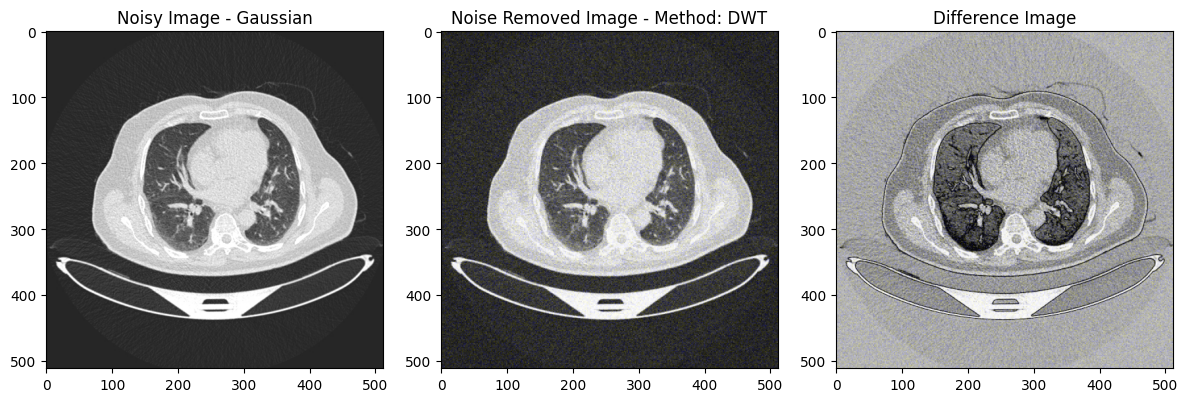

--------------------
Noise density: 15088.2827
Original Image - Noise Type: Gaussian
Denoised Image - Method: TV-Chambolle


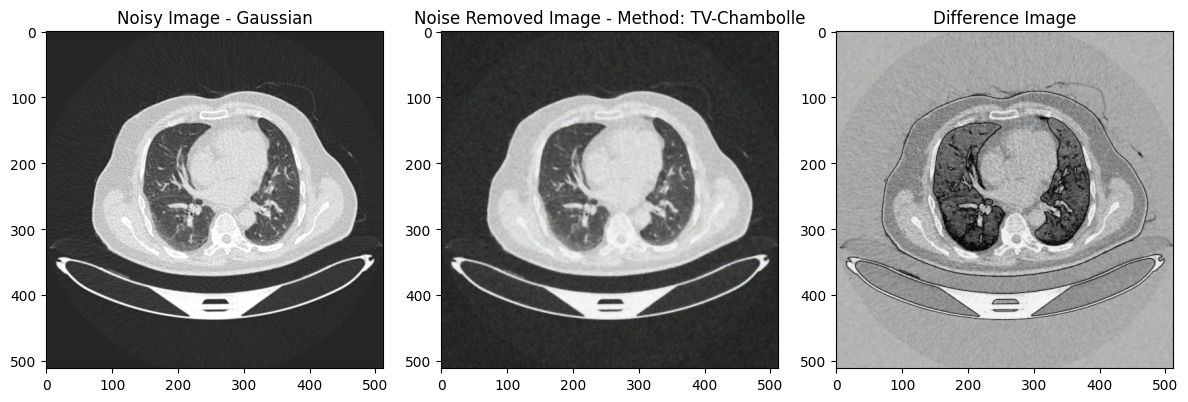

--------------------


TypeError: denoise_tv_bregman() got an unexpected keyword argument 'reg'

In [9]:
#test 8
#test7 - worked
import os
import shutil
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import skimage
from skimage.restoration import denoise_wavelet, denoise_tv_chambolle, denoise_tv_bregman, wiener
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

# Set the threshold values for MSE and SNR
mse_threshold = 100
snr_threshold = 20

# Define the directories containing the images for each category
benign = "./Bengin cases"
malignant = "./Malignant cases"
normal = "./Normal cases"

# Define the directories to store the noisy images for each category
benign_noisy = "benign_noisy"
malignant_noisy = "malignant_noisy"
normal_noisy = "normal_noisy"

# Define the directories to store the denoised images for each category
benign_denoised = "benign_denoised"
malignant_denoised = "malignant_denoised"
normal_denoised = "normal_denoised"

# Create the new directories to store the noisy and denoised images
os.makedirs(benign_noisy, exist_ok=True)
os.makedirs(malignant_noisy, exist_ok=True)
os.makedirs(normal_noisy, exist_ok=True)
os.makedirs(benign_denoised, exist_ok=True)
os.makedirs(malignant_denoised, exist_ok=True)
os.makedirs(normal_denoised, exist_ok=True)

# Define the denoising methods and their corresponding functions
denoising_methods = {
    'DWT': denoise_wavelet,
    'TV-Chambolle': denoise_tv_chambolle,
    'TV-Bregman': denoise_tv_bregman,
    'Wiener': wiener
}




# Loop over all the images in each category
for dir_path, dir_names, file_names in os.walk(benign):
    for file_name in file_names:
        # Load the image
        image_path = os.path.join(dir_path, file_name)
        image = skimage.io.imread(image_path)
        
        # Generate a noisy version of the image (e.g., by adding Gaussian noise)
        noisy_image = skimage.util.random_noise(image, mode='gaussian')
        
        # Calculate the MSE
        mse = mean_squared_error(image, noisy_image)
        
        # Calculate the SNR
        snr = peak_signal_noise_ratio(image, noisy_image)
        
        # Check if the image is noisy based on the MSE and SNR values
        if mse > mse_threshold and snr < snr_threshold:
            # Move the noisy image to the new directory
            shutil.copy(image_path, os.path.join(benign_noisy, file_name))
            
            # Iterate over different denoising methods
            for denoising_method, denoise_func in denoising_methods.items():
                # Denoise the noisy image
                if denoising_method == 'DWT':
                    denoised_image = denoise_func(noisy_image)
                elif denoising_method == 'TV-Chambolle':
                    denoised_image = denoise_func(noisy_image, weight=0.1)
                elif denoising_method == 'TV-Bregman':
                    denoised_image = denoise_func(noisy_image, reg=0.1)
                else:
                    denoised_image = denoise_func(noisy_image)
                
                # Rescale the denoised image to the range of 0 to 1
                denoised_image = skimage.exposure.rescale_intensity(denoised_image, in_range=(-1, 1))
                
                # Convert the denoised image to uint8 data type
                denoised_image = skimage.img_as_ubyte(denoised_image)
                
                # Save the denoised image to the new directory
                denoised_image_path = os.path.join(benign_denoised, f"{denoising_method}_{file_name}")
                skimage.io.imsave(denoised_image_path, denoised_image)
                
                # Rest of the code remains the same
                removed_noise = "Gaussian"
                original_image = Image.open(image_path)
                                
                # Display the images and results
                print("Noise density: {:.4f}".format(mse))            
                print("Original Image - Noise Type: {}".format(removed_noise))
                print("Denoised Image - Method: {}".format(denoising_method))

                # Calculate the absolute difference between the original and denoised images
                difference_image = ImageChops.difference(original_image, Image.fromarray((denoised_image * 255).astype(np.uint8)))
                difference_image_path = os.path.join(benign_denoised, f"difference_{denoising_method}_{file_name}")
                difference_image.save(difference_image_path)

                # Create a figure with three subplots: original image, denoised image, and difference image
                fig, axs = plt.subplots(1, 3, figsize=(12, 4))
                axs[0].imshow(original_image)
                axs[0].set_title("Noisy Image - {}".format(removed_noise))
                axs[1].imshow(denoised_image)
                axs[1].set_title("Noise Removed Image - Method: {}".format(denoising_method))
                axs[2].imshow(difference_image)
                axs[2].set_title("Difference Image")

                plt.tight_layout()
                plt.show()

                print("--------------------")

